In [41]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV


import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot') 
import pandas as pd

In [42]:
df = pd.read_csv('/Users/Paul/Desktop/General_Assembly/DSI_SM_01/projects/01-projects-weekly/project-07/starter-code/MASTER_Project7_withNoProbelmPerecent.csv')

In [43]:
df = df.ix[:,1:]

In [44]:
df =df[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]]

In [45]:
df.head() 

,FAA REGION,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,...,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,Arrival Percentage,Departure Percentage,No Diversion Percentage,Overall Chance of No Problems
0,ASO,330.0,289.0,55.0,28.0,60371.0,56735.0,0.8019,0.7794,0.7984,...,2.27,12.43,1.88,0.79,3.39,12.28,0.994906,0.994534,0.998582,0.996007
1,ASO,315.0,282.0,64.0,36.0,57736.0,54870.0,0.7789,0.7464,0.7604,...,3.03,14.43,1.63,1.36,4.04,14.65,0.994861,0.994544,0.998224,0.995876
2,ASO,257.0,233.0,63.0,44.0,55707.0,52948.0,0.8054,0.7446,0.7611,...,4.28,14.34,1.73,1.29,4.19,14.17,0.995599,0.995387,0.998030,0.996339
3,ASO,307.0,278.0,70.0,42.0,47987.0,47246.0,0.8014,0.7522,0.7414,...,3.16,14.97,1.55,1.71,4.09,16.31,0.994116,0.993602,0.997648,0.995122
4,ASO,238.0,197.0,78.0,29.0,44493.0,43448.0,0.8004,0.7810,0.7533,...,1.85,13.59,1.64,1.25,3.75,15.18,0.995466,0.994651,0.997567,0.995894


In [46]:
# turn airport into numeric ids with LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
tmp = le.fit_transform(df['FAA REGION'])
df['FAA REGION'] = tmp

In [47]:
df.head()

,FAA REGION,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,...,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,Arrival Percentage,Departure Percentage,No Diversion Percentage,Overall Chance of No Problems
0,6,330.0,289.0,55.0,28.0,60371.0,56735.0,0.8019,0.7794,0.7984,...,2.27,12.43,1.88,0.79,3.39,12.28,0.994906,0.994534,0.998582,0.996007
1,6,315.0,282.0,64.0,36.0,57736.0,54870.0,0.7789,0.7464,0.7604,...,3.03,14.43,1.63,1.36,4.04,14.65,0.994861,0.994544,0.998224,0.995876
2,6,257.0,233.0,63.0,44.0,55707.0,52948.0,0.8054,0.7446,0.7611,...,4.28,14.34,1.73,1.29,4.19,14.17,0.995599,0.995387,0.998030,0.996339
3,6,307.0,278.0,70.0,42.0,47987.0,47246.0,0.8014,0.7522,0.7414,...,3.16,14.97,1.55,1.71,4.09,16.31,0.994116,0.993602,0.997648,0.995122
4,6,238.0,197.0,78.0,29.0,44493.0,43448.0,0.8004,0.7810,0.7533,...,1.85,13.59,1.64,1.25,3.75,15.18,0.995466,0.994651,0.997567,0.995894


In [48]:
# y = df.ix[:,0]
# x= df.ix[:,7:11]

In [49]:
y = df.ix[:,0]
x= df.ix[:,18:]

In [68]:
y

0      6
1      6
2      6
3      6
4      6
5      6
6      6
7      6
8      6
9      6
10     6
11     8
12     8
13     8
14     8
15     8
16     8
17     8
18     8
19     8
20     8
21     8
22     8
23     8
24     8
25     8
26     8
27     8
28     8
29     8
      ..
775    5
776    5
777    5
778    5
779    5
780    5
781    5
782    5
783    5
784    5
785    5
786    5
787    5
788    5
789    5
790    5
791    5
792    5
793    5
794    0
795    0
796    0
797    0
798    0
799    0
800    0
801    0
802    0
803    0
804    0
Name: FAA REGION, dtype: int64

In [61]:
x

,Arrival Percentage,Departure Percentage,No Diversion Percentage,Overall Chance of No Problems
0,0.994906,0.994534,0.998582,0.996007
1,0.994861,0.994544,0.998224,0.995876
2,0.995599,0.995387,0.998030,0.996339
3,0.994116,0.993602,0.997648,0.995122
4,0.995466,0.994651,0.997567,0.995894
5,0.996594,0.995890,0.997581,0.996688
6,0.995478,0.994547,0.997272,0.995766
7,0.995260,0.994393,0.996338,0.995330
8,0.996794,0.996109,0.997678,0.996860
9,0.997771,0.997040,0.996967,0.997259


In [50]:
# # turn airport into numeric ids with LabelEncoder
# le = LabelEncoder()
# le.fit_transform(y)

In [51]:
X = x.as_matrix(columns=None)

In [52]:
k = range(1,25)

kmeansList= []
for i in k:
    kmeans = cluster.KMeans(n_clusters= i)
    kmeans.fit(X)
    labels = kmeans.labels_
    kmeansList.append(metrics.accuracy_score(y, labels))

(array([ 2.,  2.,  2.,  5.,  3.,  3.,  2.,  0.,  4.,  1.]),
 array([ 0.0136646 ,  0.0226087 ,  0.0315528 ,  0.04049689,  0.04944099,
         0.05838509,  0.06732919,  0.07627329,  0.08521739,  0.09416149,
         0.10310559]),
 <a list of 10 Patch objects>)

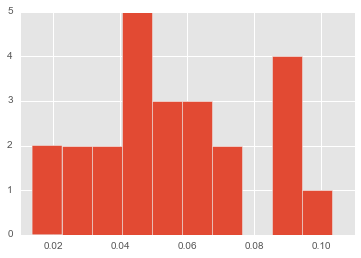

In [54]:
plt.hist(kmeansList)

In [55]:
print(metrics.classification_report(y, labels))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        11
          1       0.00      0.00      0.00        33
          2       0.10      0.05      0.06       132
          3       0.22      0.05      0.09        94
          4       0.00      0.00      0.00        44
          5       0.01      0.02      0.02        44
          6       0.00      0.00      0.00       176
          7       0.21      0.05      0.07        88
          8       0.22      0.07      0.11       183
          9       0.00      0.00      0.00         0
         10       0.00      0.00      0.00         0
         11       0.00      0.00      0.00         0
         12       0.00      0.00      0.00         0
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0
         17       0.00      0.00      0.00   

In [56]:
print(metrics.confusion_matrix(y, labels))


[[ 0  1  2  0  0  0  0  0  0  0  5  0  0  0  1  0  0  1  0  0  1  0  0  0]
 [ 7  0  4  0  0  3  1  0  2  0  0  0  0  4  6  0  1  0  4  0  1  0  0  0]
 [13  3  6 12  1 16  5  5  8  1  1  4  0 14 10  0 10  1  8  1  4  0  3  6]
 [ 9  3  4  5  0 15  0  3  4  2  5  2  0  3 11  0  2  6  8  0  3  0  3  6]
 [ 8  0  3  2  0  6  0  3  2  0  0  2  0  7  3  0  1  0  3  2  0  0  0  2]
 [ 2  0  3  0  0  1  0  0  5  0 15  0  0  1  8  0  0  0  4  0  3  0  1  1]
 [14  2 20  1  1 10  0  1 14  0 24  6  0 12 16  1  1  1 16  0 26  0  1  9]
 [ 6  1  3  3  0  4  7  4 12  0  5 10  0  4  7  0  2  0  3  2 12  0  2  1]
 [13  0 17  0  0 24  5  3 13  0 15  2  1  3 28  1  0  4 26  0 13  1  8  6]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0

In [57]:
metrics.silhouette_score(x, labels, metric='euclidean')


0.28222003983598787

KeyError: '[ 0.99600747  0.9958762   0.99633883  0.99512207  0.99589441  0.99668834\n  0.99576572  0.99533022  0.99686024  0.99725947  0.99520048  0.99375903\n  0.99908808  0.99471649  0.99598969  0.99359159  0.99754882  0.99702929\n  0.99637399  0.99677626  0.99490822  0.99736373  0.99906107  0.99914191\n  0.99588698  0.99723104  0.99636545  0.99760569  0.99769131  0.99663766\n  0.99756736  0.99615561  0.99819038  0.99416616  0.99262558  0.99600357\n  0.99560831  0.9956338   0.99631571  0.99430631  0.99241832  0.99506729\n  0.99665964  0.99518533  0.99289022  0.99155976  0.99583663  0.99501854\n  0.99564797  0.99636866  0.99416     0.99407427  0.99565632  0.99605552\n  0.99329586  0.9781199   0.99342681  0.9957638   0.99503296  0.99469369\n  0.99607269  0.99276242  0.99361158  0.99571643  0.9959521   0.99126038\n  0.99291533  0.99279488  0.9961427   0.99374184  0.99491627  0.99468657\n  0.99018663  0.99189706  0.9949466   0.99583789  0.99115293  0.99178293\n  0.994544    0.99633236  0.99483342  0.99416687  0.99619482  0.99328564\n  0.99347716  0.99534953  0.99627566  0.99260507  0.98938013  0.99577287\n  0.99602533  0.9946329   0.99431587  0.99576336  0.9936677   0.99327317\n  0.9955434   0.99592177  0.99247357  0.99286684  0.99303999  0.99405789\n  0.99110712  0.99325809  0.99607482  0.99521883  0.99401302  0.99582641\n  0.99458727  0.99366877  0.985955    0.98446999  0.9877788   0.9883453\n  0.98154078  0.98871895  0.9886575   0.98923553  0.99236093  0.99344202\n  0.98910737  0.99315886  0.98994891  0.99197455  0.99324698  0.99054501\n  0.99507469  0.99495574  0.99284988  0.99315231  0.9928641   0.98744271\n  0.99100516  0.97440594  0.99465871  0.99399238  0.98834755  0.99620912\n  0.99360236  0.99382902  0.99148658  0.9950518   0.99175831  0.97617327\n  0.99414495  0.99436216  0.99023422  0.99117762  0.9956524   0.99508186\n  0.99426402  0.99513439  0.99501214  0.99391059  0.96016285  0.99439907\n  0.99454015  0.99294362  0.99174701  0.99436728  0.99139726  0.99287943\n  0.99490908  0.99393135  0.99053702  0.98866571  0.99676558  0.99454201\n  0.99372151  0.99499442  0.99614964  0.99559313  0.99393135  0.99589492\n  0.99390287  0.99366582  0.99272031  0.99335151  0.99096705  0.99207641\n  0.9908308   0.99351594  0.99257711  0.99140448  0.99152971  0.9917504\n  0.99156404  0.98508093  0.98686288  0.98825979  0.98758809  0.98794291\n  0.99012074  0.98899286  0.98754225  0.99199761  0.99297368  0.99115236\n  0.98867548  0.99033742  0.98739478  0.9785364   0.98253799  0.98678105\n  0.98830319  0.98491674  0.98742044  0.98345692  0.98399818  0.99431904\n  0.99518886  0.99272635  0.99132803  0.99234201  0.99422432  0.99345094\n  0.99341949  0.99546778  0.9950479   0.99457447  0.9707151   0.99177254\n  0.99374379  0.99149717  0.99206099  0.99345021  0.99219435  0.99266346\n  0.99573832  0.99330113  0.98983304  0.98750597  0.97913739  0.98917018\n  0.98872126  0.989882    0.99036701  0.98617607  0.98844101  0.99525991\n  0.99411223  0.98919325  0.96653237  0.99238764  0.990493    0.98860384\n  0.98956068  0.99228402  0.99241738  0.9913224   0.99195158  0.99279009\n  0.99259376  0.97408661  0.99616442  0.99402406  0.99231135  0.99245132\n  0.99577327  0.99376561  0.99517174  0.99625426  0.99503953  0.99328215\n  0.99254165  0.98896112  0.99322414  0.99425205  0.99294603  0.99507334\n  0.99203211  0.99275404  0.99334845  0.99302804  0.99190339  0.99361842\n  0.99400785  0.99247963  0.99233048  0.99248273  0.99431403  0.99363746\n  0.9927784   0.99353346  0.99329165  0.9932669   0.99493132  0.9953231\n  0.99449901  0.99410059  0.99501203  0.99647812  0.99574301  0.99529058\n  0.99572189  0.99544315  0.99379066  0.99430873  0.9946728   0.99133241\n  0.98994465  0.98973661  0.99076755  0.98952266  0.9891832   0.98941633\n  0.99124753  0.98995096  0.96319086  0.99336745  0.98510144  0.99346836\n  0.99242332  0.989223    0.99369666  0.99632621  0.99675355  0.99393932\n  0.99487075  0.9949279   0.99644939  0.99589658  0.99387555  0.99537154\n  0.99476347  0.99305617  0.99681961  0.99636263  0.99630582  0.99250219\n  0.99243889  0.99479552  0.99164437  0.99428751  0.99739326  0.99528092\n  0.99665182  0.9946041   0.99453213  0.99460673  0.99311357  0.99362865\n  0.99595079  0.99490304  0.99309042  0.99640726  0.99481156  0.99424662\n  0.98766386  0.99002376  0.99005529  0.98881002  0.98926861  0.99174249\n  0.98797767  0.99014203  0.99298948  0.99039399  0.98850278  0.99437057\n  0.99506136  0.99434117  0.99387755  0.99262149  0.99575416  0.99530706\n  0.99510083  0.9959979   0.99639157  0.99527734  0.99333375  0.99377067\n  0.99289116  0.99116727  0.99219135  0.99384039  0.99059586  0.99141625\n  0.99377142  0.99125282  0.9872261   0.99207318  0.99275913  0.99265835\n  0.99288252  0.99131393  0.99340111  0.99459705  0.99313505  0.99444754\n  0.99415476  0.99446057  0.99160178  0.99202545  0.98953717  0.98894635\n  0.98826594  0.9925626   0.9883441   0.98855041  0.98505501  0.98702347\n  0.98453264  0.99472355  0.99503628  0.99276268  0.99302824  0.9918775\n  0.9937981   0.9940145   0.99312754  0.99481492  0.99412813  0.9932929\n  0.99595096  0.99676835  0.99771761  0.99606491  0.99590389  0.99687544\n  0.99654037  0.99708891  0.99812436  0.99714561  0.99539077  0.99360834\n  0.99454732  0.99281315  0.9939326   0.99382499  0.99526655  0.99306467\n  0.99225318  0.99310902  0.99342083  0.99145158  0.99517209  0.99555508\n  0.99422883  0.99207296  0.99173591  0.99482492  0.99367858  0.98996047\n  0.99559484  0.99354528  0.9916278   0.98793071  0.98543815  0.9869233\n  0.9832123   0.98606393  0.98962138  0.98322983  0.98726272  0.99105413\n  0.99148675  0.98864413  0.98977009  0.99235871  0.99004484  0.98765404\n  0.99063148  0.99372292  0.99038589  0.99119448  0.99131993  0.99116426\n  0.98927682  0.98220002  0.98481477  0.99070319  0.98802962  0.98950411\n  0.99198983  0.99087439  0.99376142  0.99469604  0.98942129  0.99269165\n  0.99337066  0.99236096  0.99360562  0.99059686  0.99379023  0.99341734\n  0.98689497  0.99089096  0.9909635   0.99380602  0.98934047  0.99385879\n  0.99354666  0.99503681  0.99113795  0.99251349  0.99427939  0.9923814\n  0.99103347  0.9942082   0.99020447  0.99002729  0.99584993  0.99522786\n  0.99649455  0.99173942  0.99357146  0.99471144  0.99375065  0.99393328\n  0.99678821  0.99532321  0.99197605  0.99592775  0.9943253   0.98903642\n  0.99054738  0.9928575   0.99244714  0.99314489  0.99233689  0.99448646\n  0.99215203  0.99068367  0.99074158  0.99063891  0.99399122  0.99213853\n  0.99340157  0.99407755  0.99258441  0.99305846  0.99624987  0.9958592\n  0.9946293   0.99309348  0.99328554  0.9944486   0.98963129  0.9909879\n  0.99310107  0.99194276  0.98876988  0.99211563  0.98998082  0.98584091\n  0.99479189  0.99333874  0.9943087   0.99171334  0.99238896  0.99504589\n  0.99153808  0.99390511  0.99539556  0.9946209   0.99375208  0.99340156\n  0.99122639  0.99135594  0.98561444  0.98816972  0.98996691  0.98555237\n  0.99016281  0.99368279  0.99236288  0.99142655  0.98644238  0.98400716\n  0.98393868  0.97921912  0.98389311  0.98839492  0.98585667  0.98300207\n  0.98575159  0.98677774  0.98129194  0.98420977  0.98167983  0.98268014\n  0.97637     0.97771154  0.98321498  0.98249254  0.9816499   0.98647867\n  0.98648298  0.98131299  0.99204672  0.99217048  0.9950461   0.99405309\n  0.99366451  0.99474864  0.99285039  0.99402469  0.99586398  0.99322972\n  0.99546863  0.95517336  0.99091986  0.99057819  0.99120178  0.99504093\n  0.99301323  0.98648118  0.98848304  0.99349622  0.99350799  0.98960989\n  0.99279345  0.99336654  0.99352235  0.98826183  0.99193976  0.99395905\n  0.99266265  0.99243856  0.99560577  0.99387743  0.98911755  0.98253941\n  0.99514874  0.9942257   0.9899972   0.99132936  0.99242751  0.99336911\n  0.99240607  0.9957629   0.99179787  0.98916938  0.9911573   0.99252776\n  0.99267822  0.99082497  0.99102502  0.99501327  0.99352176  0.99169999\n  0.99423729  0.99336639  0.98474497  0.98049418  0.9929128   0.9957248\n  0.99080286  0.99492298  0.99602362  0.99047712  0.99448053  0.99818584\n  0.99571936  0.99712315  0.97505211  0.98990965  0.99188144  0.98848861\n  0.99200231  0.99555343  0.99055187  0.98972572  0.99411219  0.99367121\n  0.99155968  0.99402319  0.99244904  0.99180916  0.99109359  0.99048647\n  0.99451384  0.98973469  0.99189115  0.99375701  0.99357892  0.98137998\n  0.99435119  0.99137236  0.99283895  0.99003908  0.99124821  0.99337544\n  0.99158734  0.99018836  0.99467721  0.99344698  0.99169172  0.9823704\n  0.98673732  0.97960164  0.97380458  0.97452787  0.98691819  0.98620399\n  0.9801157   0.98884107  0.9839453   0.97725702  0.99883769  0.99911016\n  0.99950312  1.          0.99986136  1.          0.99347183  0.99246432\n  0.99363611  0.98646193  0.99087512  0.99352271  0.9886808   0.99464165\n  0.99672402  0.99113483  0.99282281  0.98737022  0.98439425  0.98704221\n  0.983279    0.98458549  0.98733126  0.98672977  0.98462359  0.99308958\n  0.99257008  0.98982201  0.97497403  0.99010873  0.99379845  0.99051776\n  0.99260433  0.99528102  0.99306101  0.9913837   0.9958111   0.99340415\n  0.99252831  0.97172714  0.99321444  0.99138225  0.98944018  0.99036061\n  0.99398856  0.99169971  0.99297949  0.99399728  0.99285987  0.98785196\n  0.98784752  0.99693955  0.99604243  0.99322727  0.98926623  0.99326396\n  0.99367388  0.99258932  0.99437666  0.99226547  0.98647416  0.99410406\n  0.99412646  0.99524409  0.98733922  0.99319452  0.9940632   0.99167398\n  0.99444872  0.99675114  0.99358066  0.99455726  0.99295839  0.99661825\n  0.99699477  0.99693299  0.9953434   0.99763122  0.997324    0.99751552\n  0.99731334  0.99693208  0.99653529  0.99416429  0.99493848  0.99525878\n  0.99449949  0.99451472  0.99704094  0.99719995  0.99707401  0.99628339\n  0.99729431  0.99715706  0.97686854  0.99512815  0.99567638  0.99591279\n  0.99651256  0.99518413  0.99777467  0.99721282  0.99699592  0.9978748\n  0.99817659] not in index'

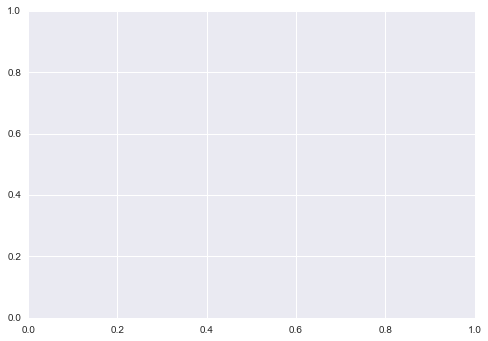

In [71]:
df.plot(kind='scatter',x= df['Overall Chance of No Problems'],y=df['FAA REGION'])


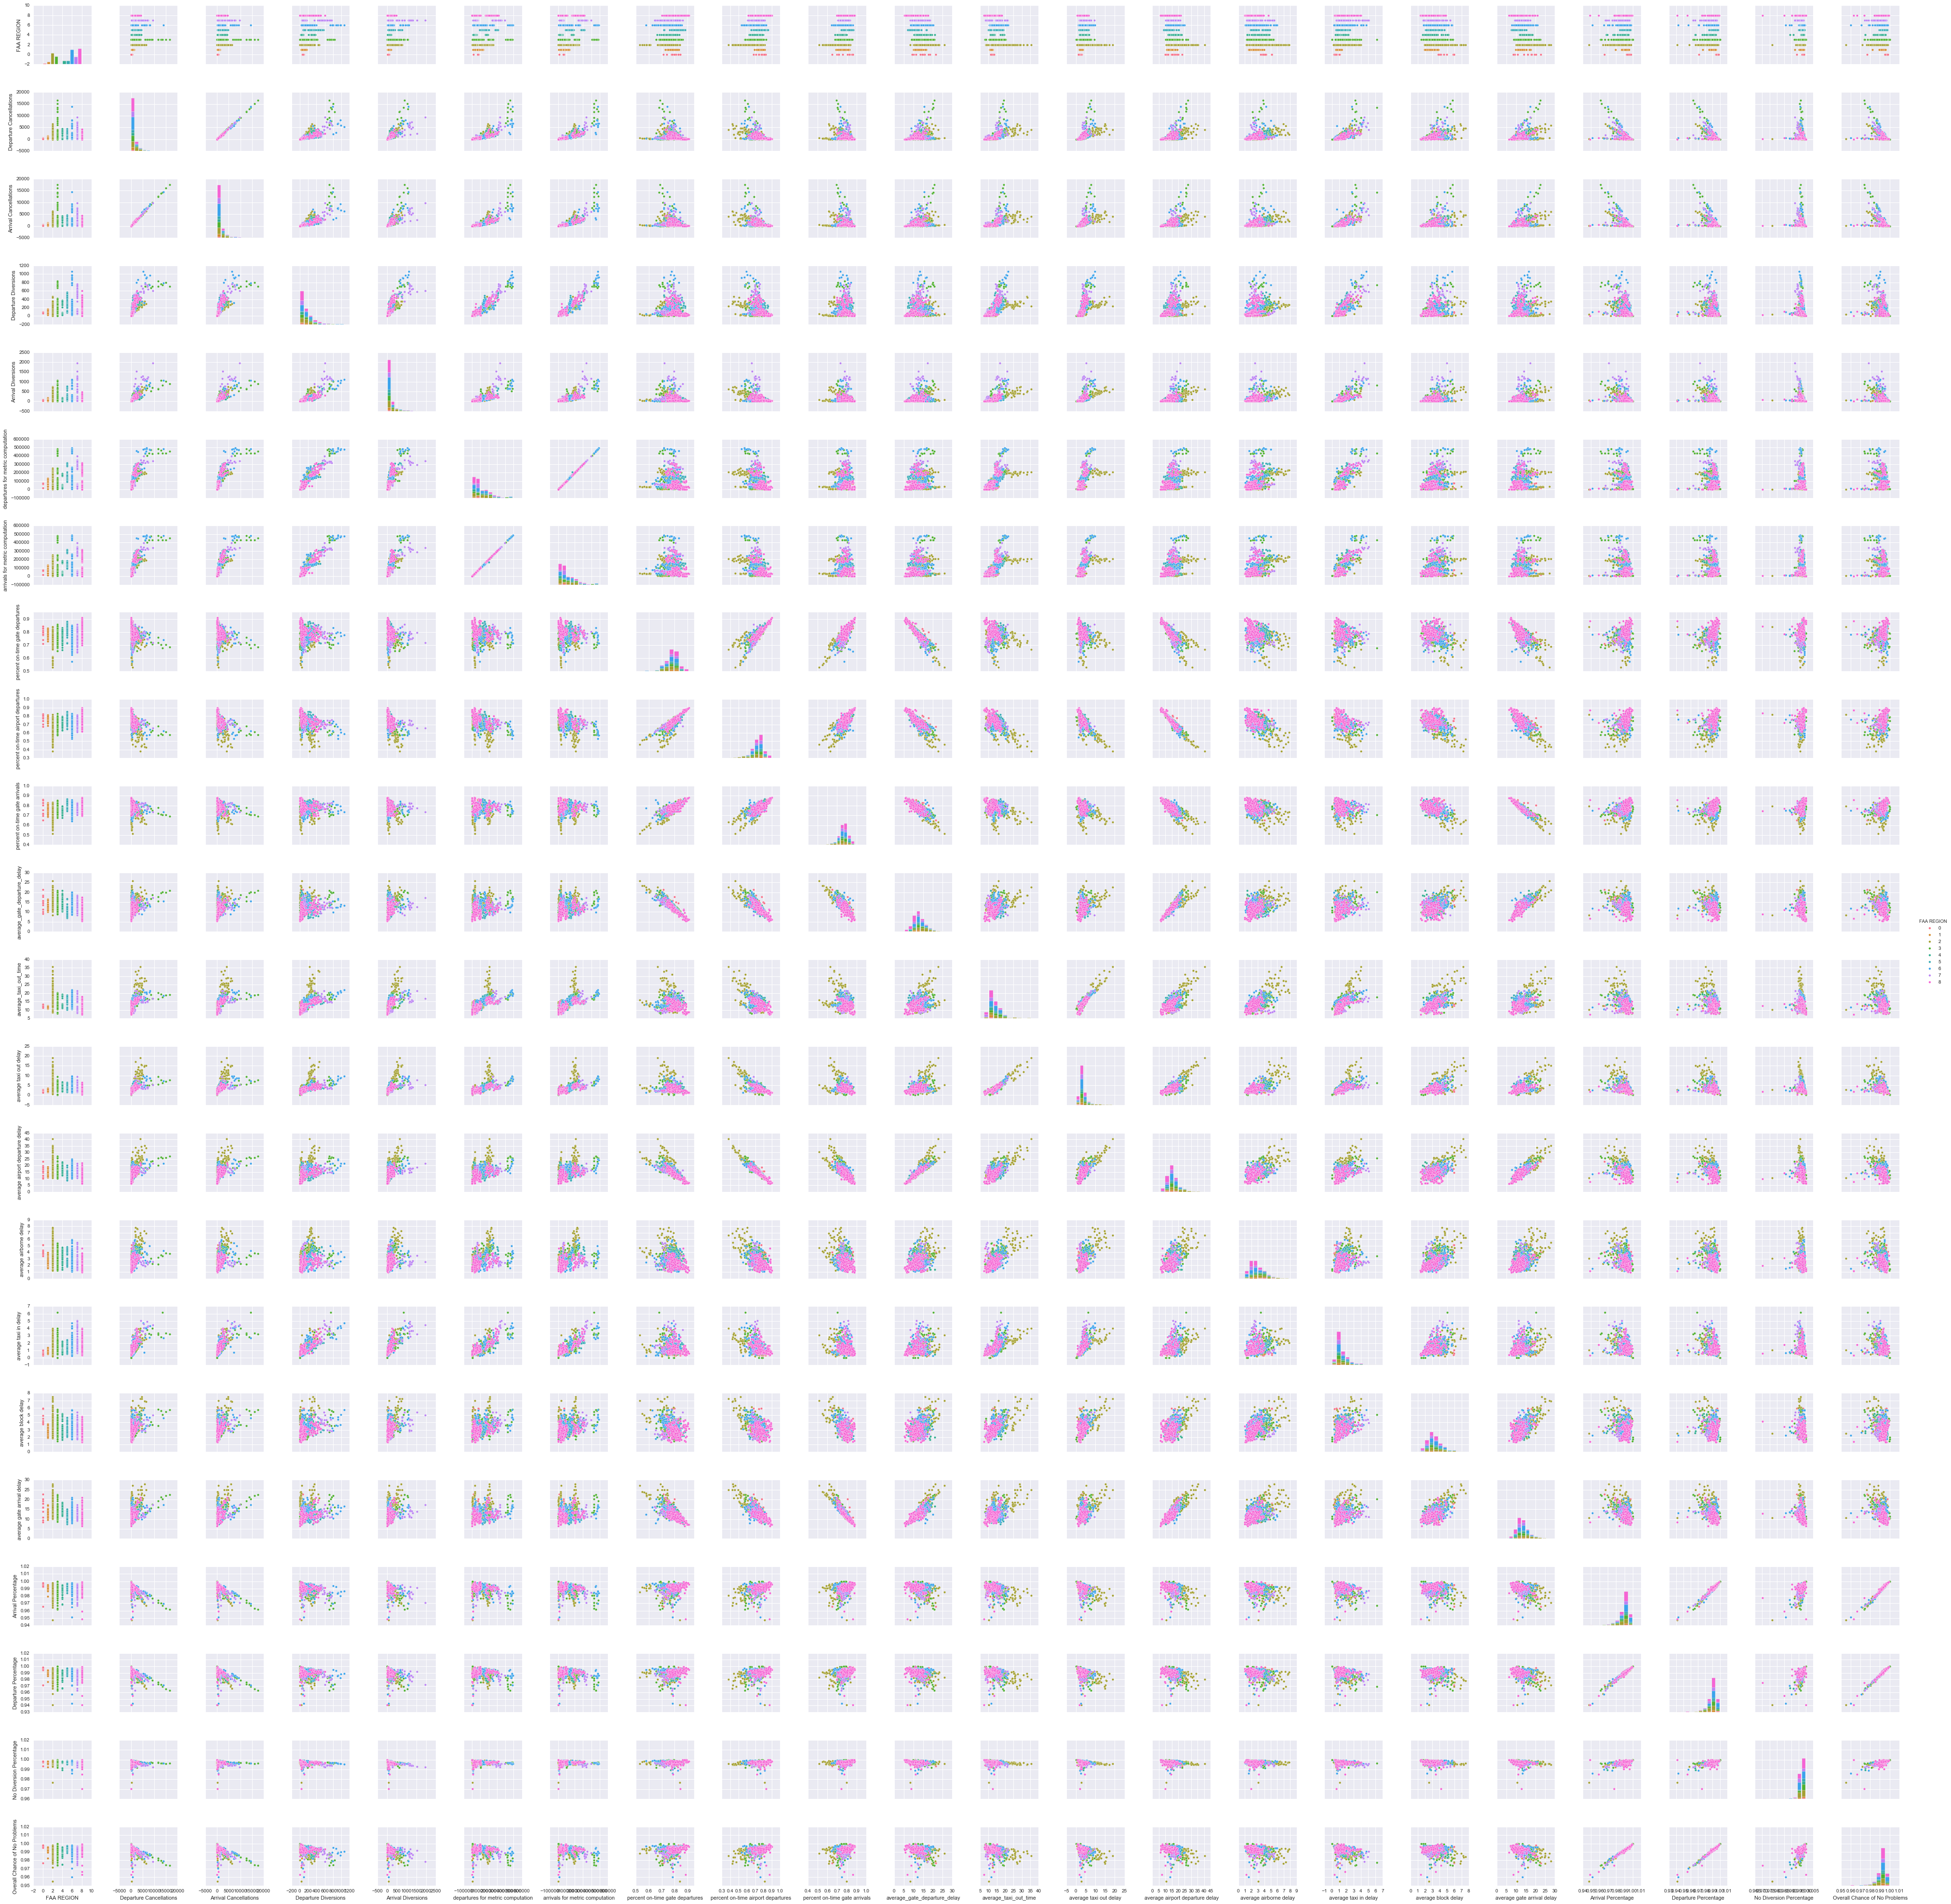

In [60]:
sns.set()
sns.pairplot(df, hue = "FAA REGION")

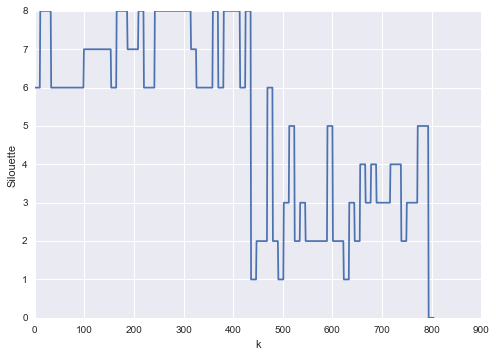

In [65]:
metrics.silhouette_score(X, labels, metric='euclidean')
plt.plot(y)
plt.ylabel("Silouette")
plt.xlabel("k")
sns.despine()

In [ ]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distict cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
